# Compare the B2015 tracks generated by Python and IDL code

In [1]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    # 'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

# import scipy.io

# github_dir = '/home/dingshandeng/github/ysoisochrone/'
github_dir = '/Users/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))

# import ysoisochrone.utils as utils
# import ysoisochrone.bayesian as bayesian
# import ysoisochrone.plotting as plotting
import ysoisochrone

I noticed that the tracks generated from IDL and Python are not the same

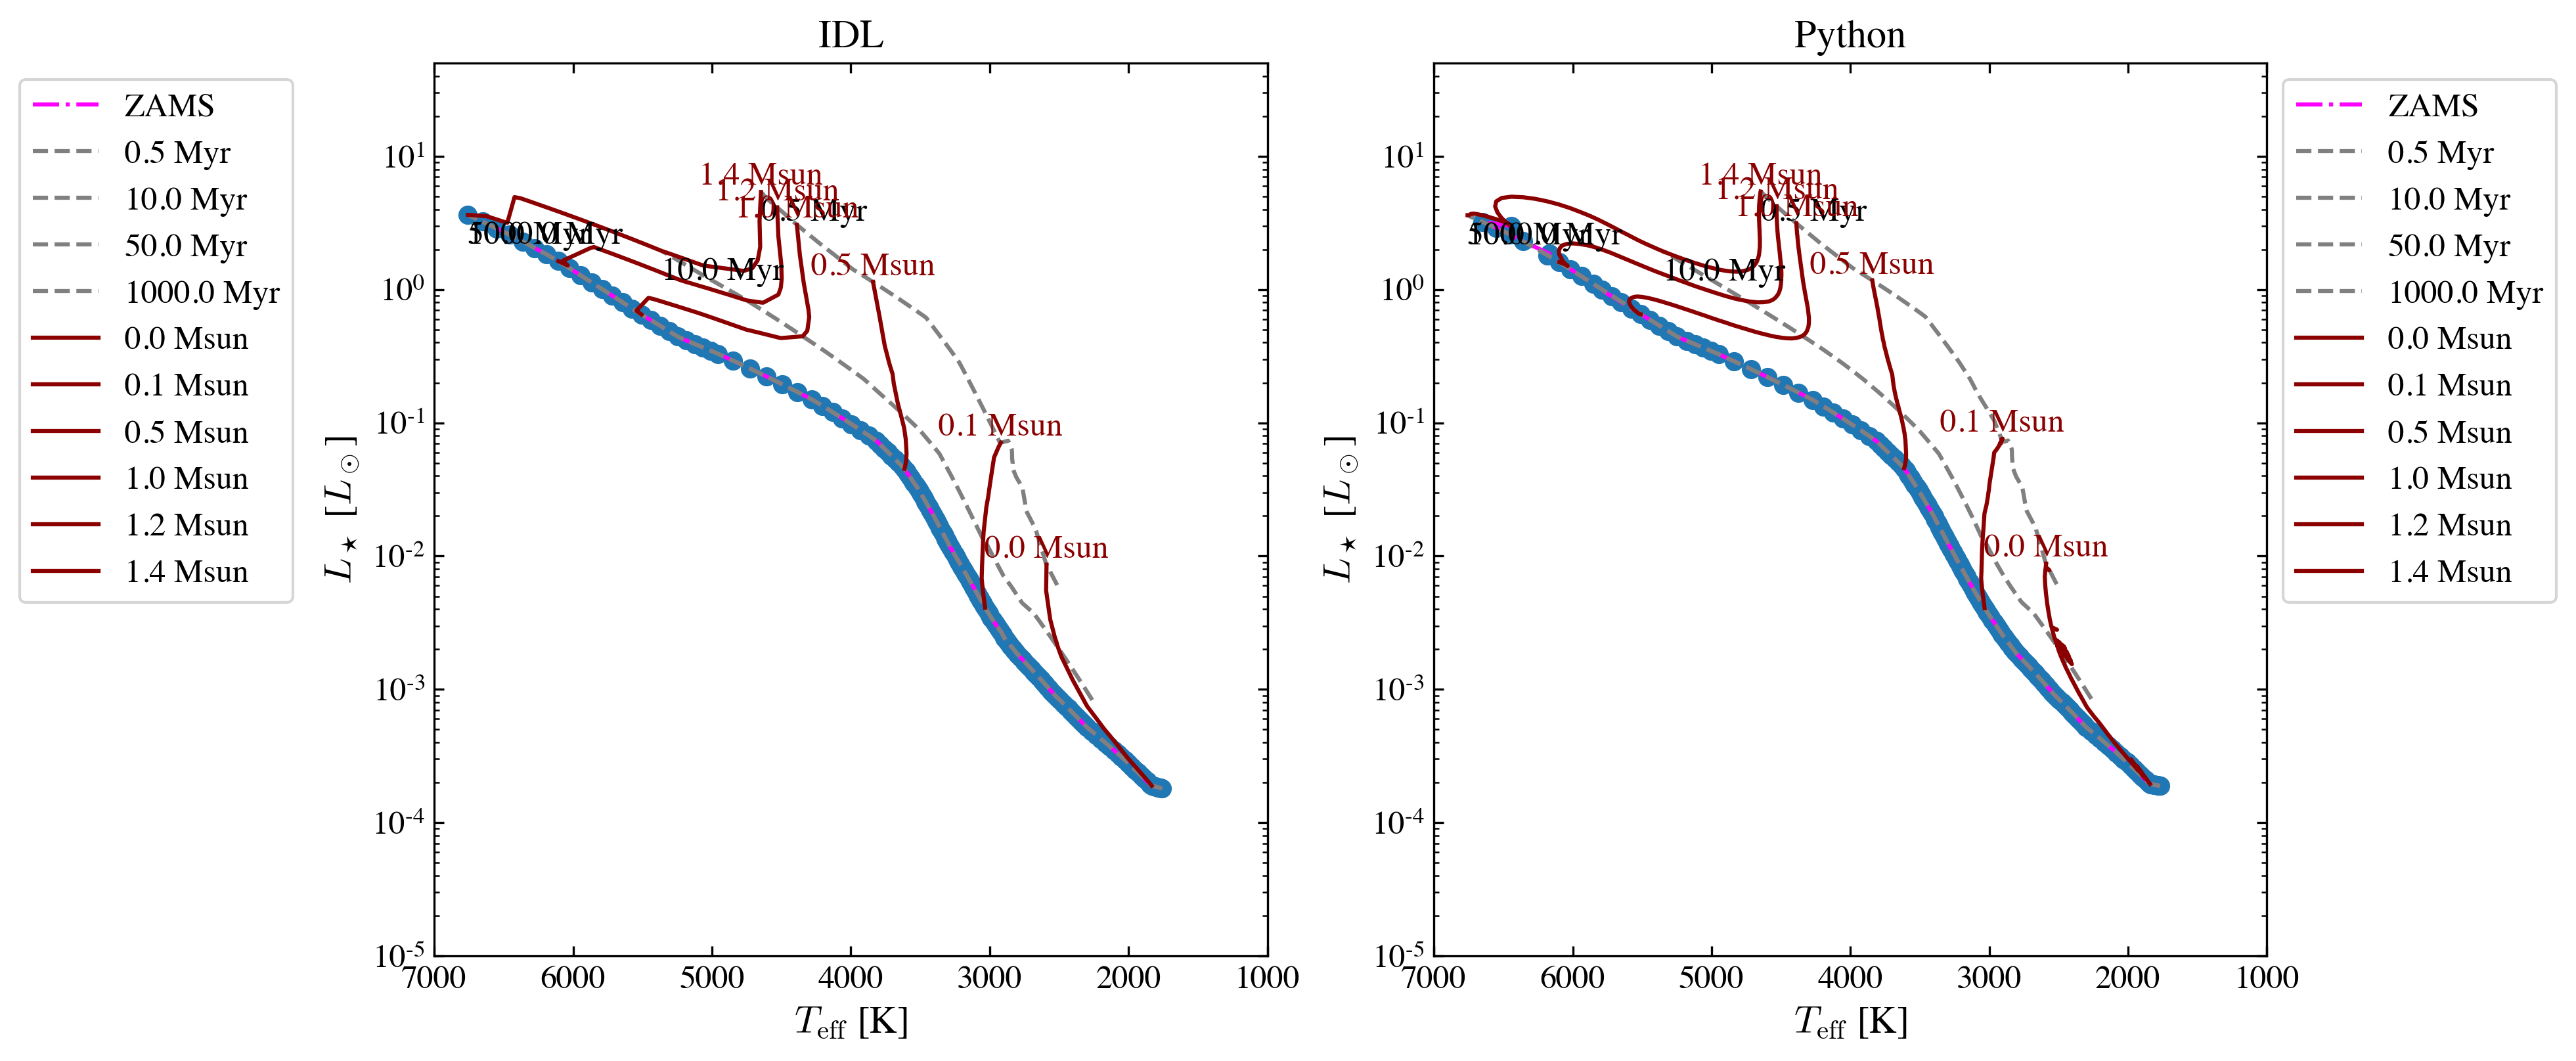

In [2]:
# Initialize the isochrone class with default data directory
isochrone_idl = ysoisochrone.isochrone.Isochrone()

mat_file_dir = './isochrones_data_archive/Baraffe_fromidlsav_AgeMassGrid.mat'
isochrone_idl.set_tracks('customize', load_file=mat_file_dir)

# find the ZAMS
teff_zams_idl, lum_zams_idl, mask_pms_idl = ysoisochrone.utils.find_zams_curve(isochrone_idl)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
ysoisochrone.plotting.plot_hr_diagram(isochrone_idl, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 10.0e6, 50.0e6, 1000.0e6], 
                                      masses_to_plot=[0.02, 0.1, 0.5, 1.0, 1.2, 1.39],
                                      xlim_set=[7000, 1000], ylim_set=[1e-5, 50.0], 
                                      zams_curve=True)

# plot the ZAMS
ax.scatter(teff_zams_idl, lum_zams_idl)

axes[0].set_title('IDL')
axes[0].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

isochrone_py = ysoisochrone.isochrone.Isochrone()

# isochrone_py.set_tracks('Baraffe2015')

mat_file_dir = './isochrones_data/Baraffe_AgeMassGrid_YSO_refine_matrix.mat'
isochrone_py.set_tracks('customize', load_file=mat_file_dir)

# find the ZAMS
teff_zams_py, lum_zams_py, mask_pms_py = ysoisochrone.utils.find_zams_curve(isochrone_py)

# mat_file_dir = './isochrones_data/Baraffe_AgeMassGrid_YSO_up1Gyr_matrix.mat'
# isochrone.set_tracks('customize', load_file=mat_file_dir)

ax = axes[1]
ysoisochrone.plotting.plot_hr_diagram(isochrone_py, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 10.0e6, 50.0e6, 1000.0e6], 
                                      masses_to_plot=[0.02, 0.1, 0.5, 1.0, 1.2, 1.39],
                                      xlim_set=[7000, 1000], ylim_set=[1e-5, 50.0], 
                                      zams_curve=True)

# plot the ZAMS
ax.scatter(teff_zams_py, lum_zams_py)

axes[1].set_title('Python')
# axes[1].legend(bbox_to_anchor=(-0.15, 1.0), loc='upper right')

plt.show()

[]


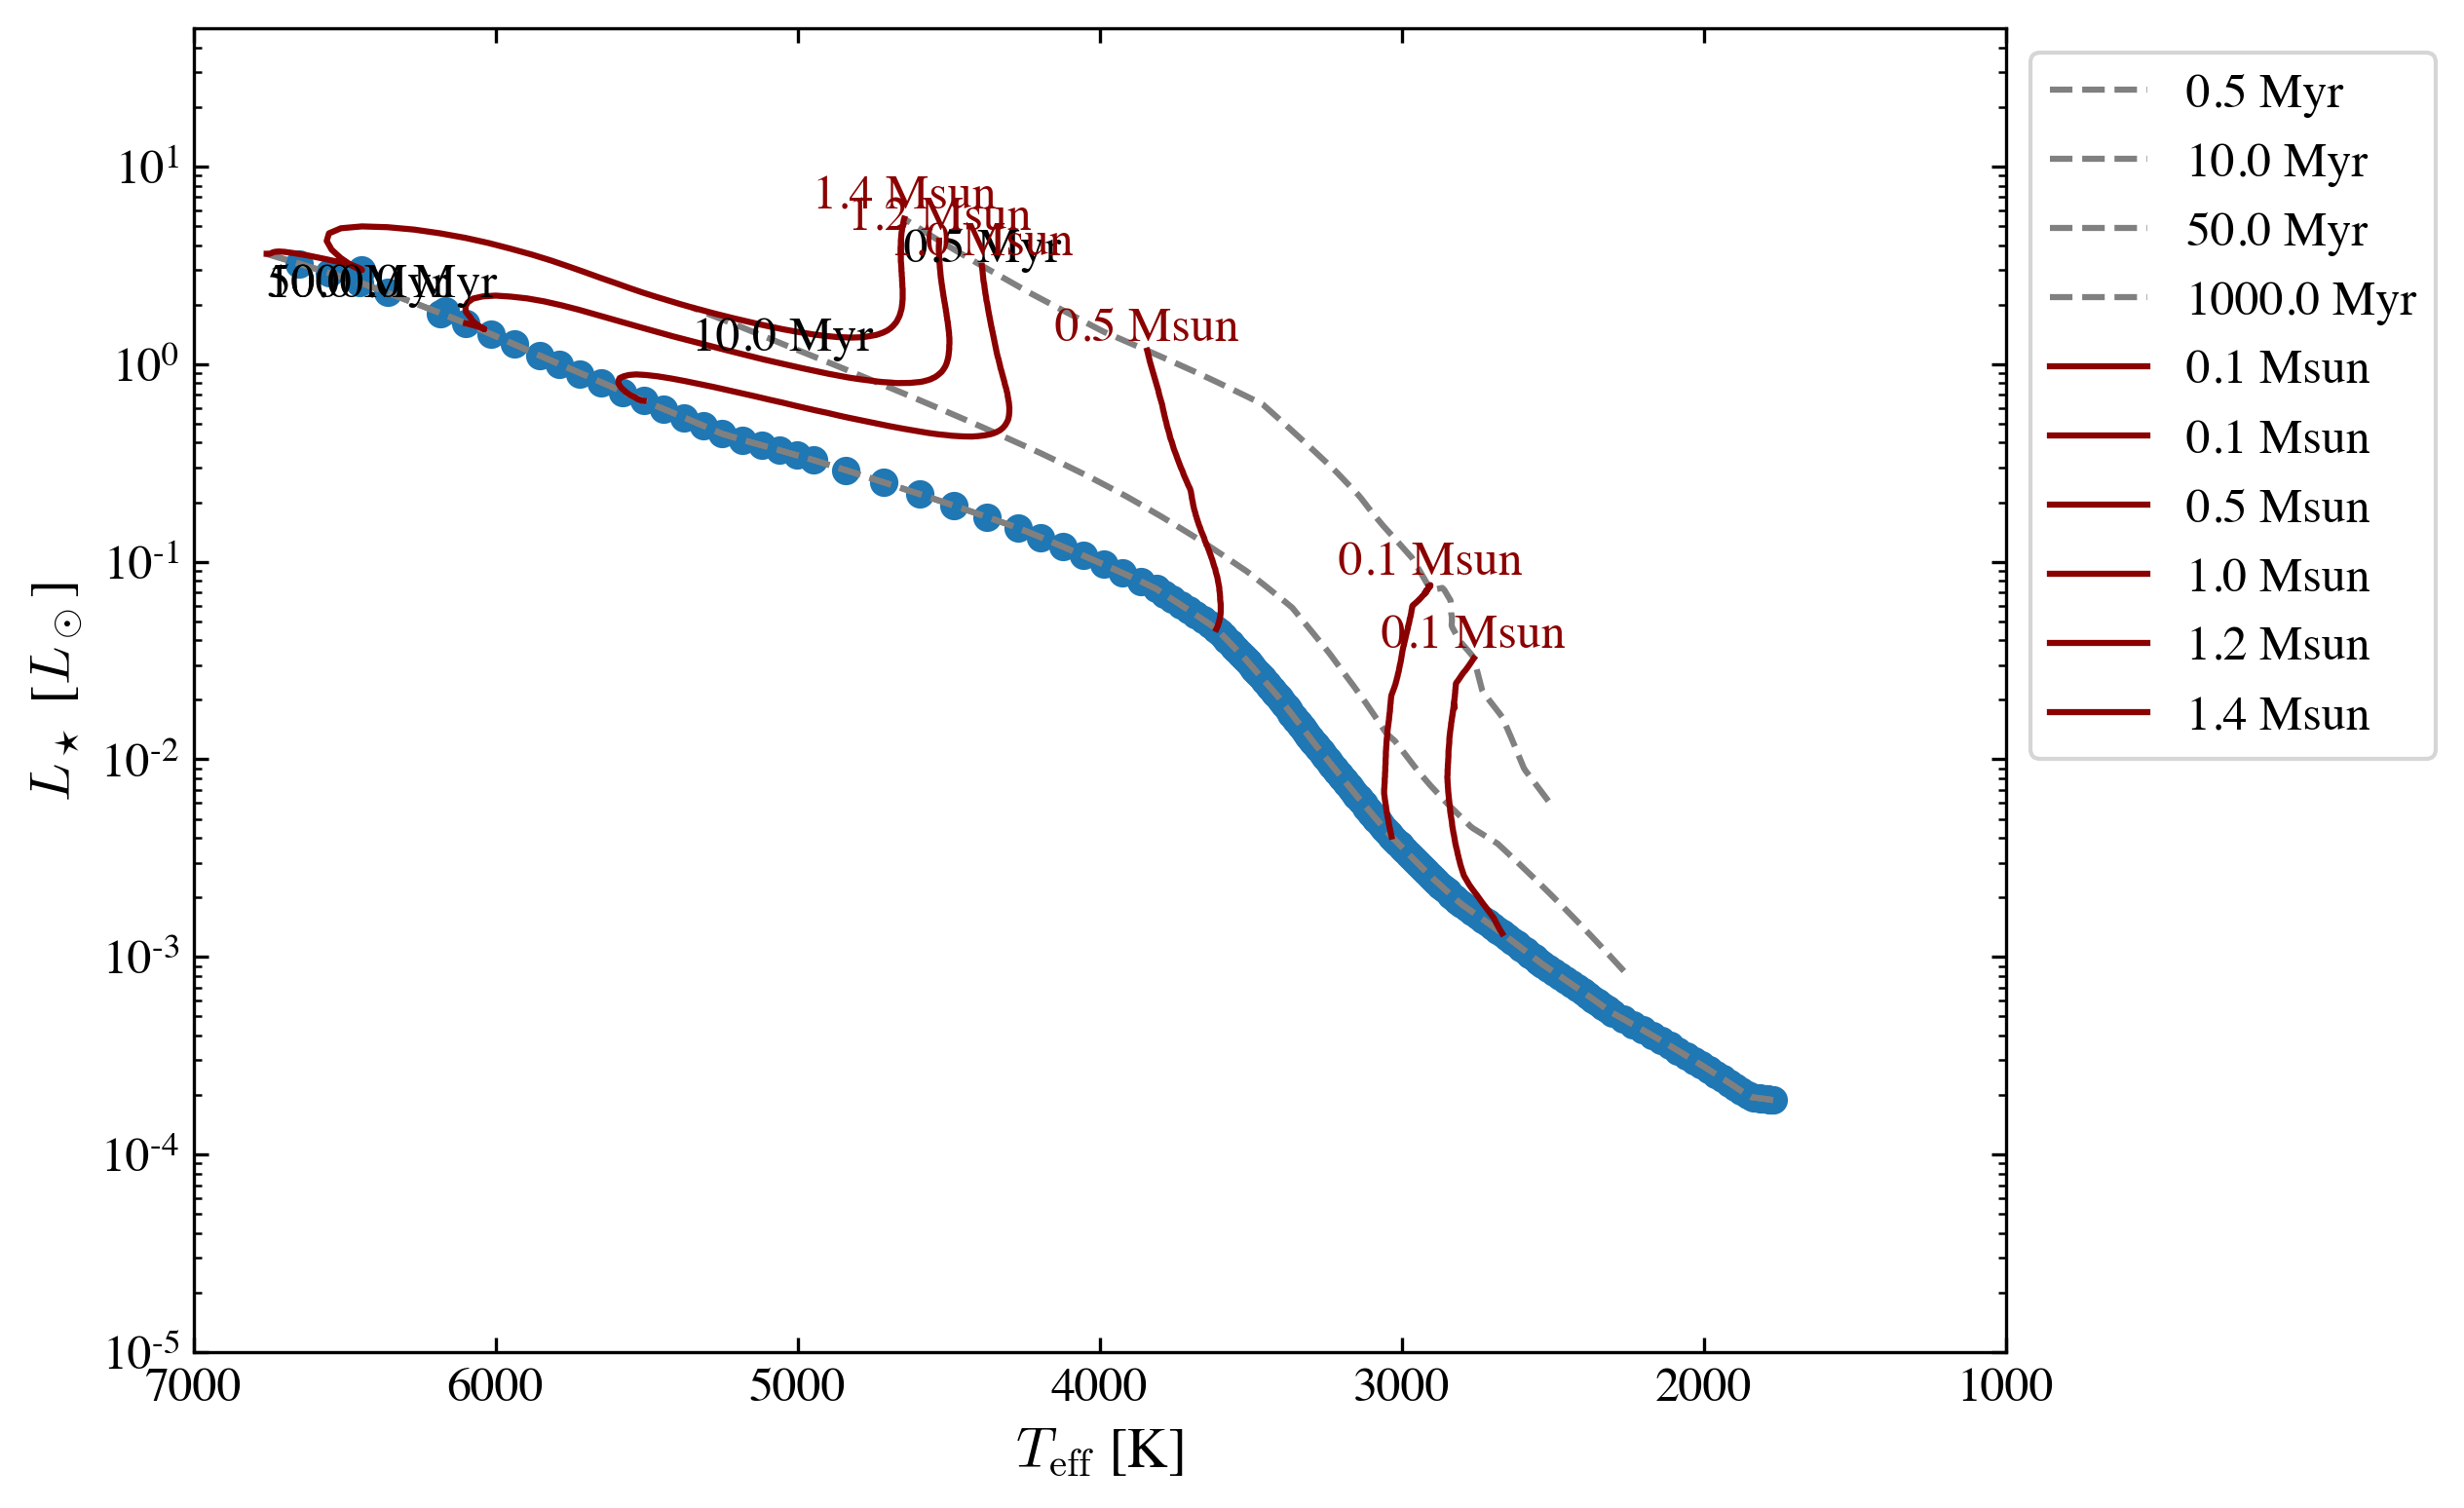

In [3]:
isochrone_t = isochrone_py

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# mat_file_dir = './isochrones_data/Baraffe_AgeMassGrid_YSO_up1Gyr_matrix.mat'
# isochrone.set_tracks('customize', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone_t, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 10.0e6, 50.0e6, 1000.0e6], 
                                      masses_to_plot=[0.05, 0.1, 0.5, 1.0, 1.2, 1.39],
                                      xlim_set=[7000, 1000], ylim_set=[1e-5, 50.0], 
                                      zams_curve=False)


# find the ZAMS
teff_zams, lum_zams, mask_pms = ysoisochrone.utils.find_zams_curve(isochrone_t)

# Plot ZAMS curve
ax.scatter(teff_zams, lum_zams) # , 'b-', label='ZAMS')

idx_lw = 62 # 60
idx_up = 65 # 90
idx_selected = (lum_zams[idx_lw: idx_up] > 3e-2)
teff_zams_part = teff_zams[idx_lw: idx_up]
lum_zams_part = lum_zams[idx_lw: idx_up]
print(teff_zams_part[idx_selected])
ax.scatter(teff_zams_part[idx_selected], lum_zams_part[idx_selected], edgecolors='C1', color='None') 

plt.show()

In [4]:
isochrone_t = isochrone_py

masses = isochrone_t.masses
log_ages = isochrone_t.log_age
logtlogl = isochrone_t.logtlogl

# find the ZAMS
teff_zams, lum_zams, mask_pms = ysoisochrone.utils.find_zams_curve(isochrone_t)

idx_lw = 62
idx_up = 65
idx_selected = (lum_zams[idx_lw: idx_up] > 3e-2)
teff_zams_part = teff_zams[idx_lw: idx_up]
lum_zams_part = lum_zams[idx_lw: idx_up]
masses_part = masses[idx_lw: idx_up]
print(teff_zams_part[idx_selected])
print(lum_zams_part[idx_selected])
print(masses_part[idx_selected])
print(teff_zams[idx_lw: idx_up])
print(lum_zams[idx_lw: idx_up])
print(masses[idx_lw: idx_up])

[]
[]
[]
[2824.87569857 2836.25797079 2847.95851317]
[0.00198564 0.00205883 0.00213691]
[0.06253041 0.06398693 0.06547737]


0.06253040752055038
lum = 1.986e-03
0.06398692782023896
lum = 2.059e-03
0.06547737483602496
lum = 2.137e-03


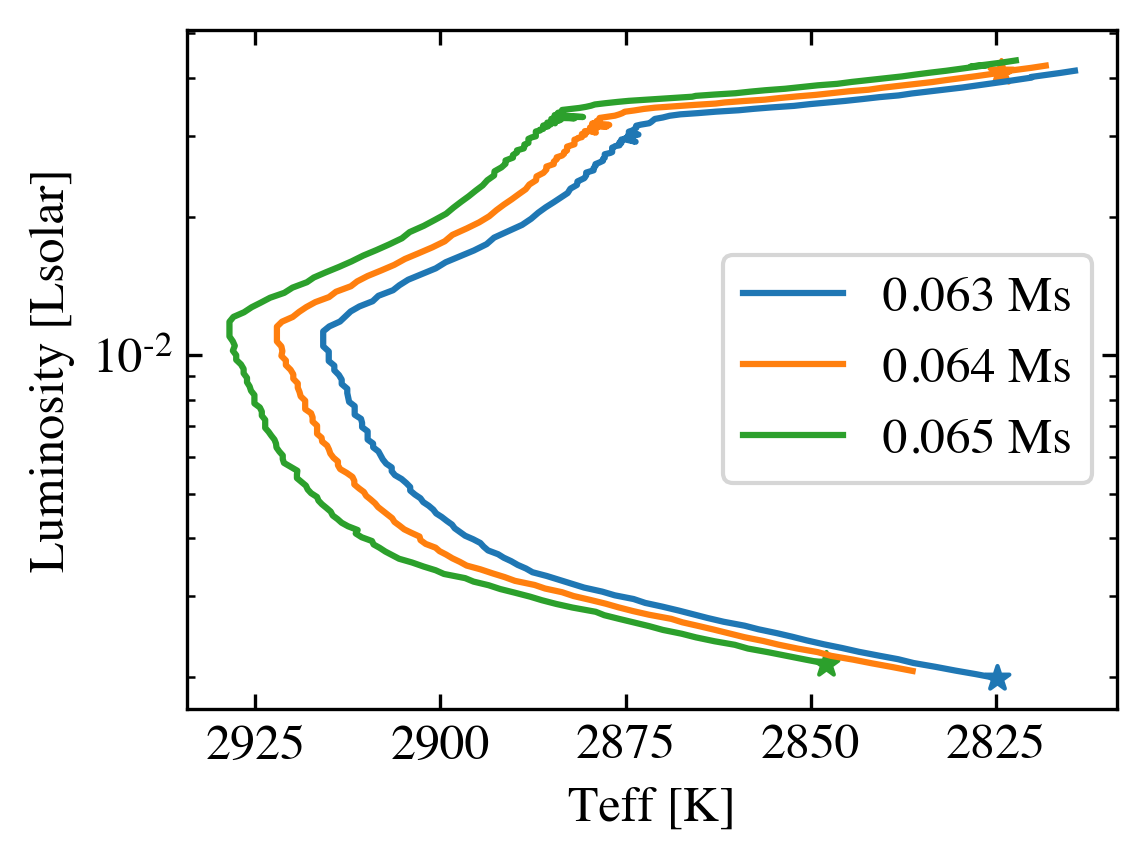

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))

# for i, mass in enumerate(masses):
    # print(i)
for i in [62, 63, 64]: # [215]:
    print(masses[i])
    # Extract Teff, L/Lo, and age for the given mass track
    teff_track = 10**logtlogl[:, i, 0]  # Teff for this mass
    lum_track = 10**logtlogl[:, i, 1]   # Luminosity for this mass
    age_track = 10**log_ages            # Age for this track in years
    
    ax.plot(teff_track, lum_track, label='%.3f Ms'%(masses[i]))

    # zams_idx = np.where(~np.isnan(teff_track))[0][-1]
    # zams_idx = np.where(~np.logical_or(np.isnan(teff_track), np.isnan(lum_track)))[0][-1]
    
    zams_idx0 = ysoisochrone.utils.find_zams_index(teff_track, lum_track, age_track)
    ax.scatter(teff_track[zams_idx0], lum_track[zams_idx0], marker='*')
    
    select = np.where(~np.logical_or(np.isnan(teff_track), np.isnan(lum_track)))[0]
    if len(select) > 0:
        zams_idx = select[-1]
    else:
        # then all of these numbers are NaN
        zams_idx = len(teff_track) - 1
    
    print('lum = %.3e'%(lum_track[zams_idx]))
    ax.scatter(teff_track[zams_idx], lum_track[zams_idx], color='None')

ax.set_xlabel('Teff [K]')
ax.set_ylabel('Luminosity [Lsolar]')

ax.legend()
ax.set_yscale('log')
ax.invert_xaxis()
plt.show()

In [6]:
isochrone_t = isochrone_idl

masses = isochrone_t.masses
log_ages = isochrone_t.log_age
logtlogl = isochrone_t.logtlogl

# find the ZAMS
teff_zams, lum_zams, mask_pms = ysoisochrone.utils.find_zams_curve(isochrone_t)

idx_lw = 60
idx_up = 90
# idx_selected = (lum_zams[idx_lw: idx_up] > 3e-2)
# teff_zams_part = teff_zams[idx_lw: idx_up]
# lum_zams_part = lum_zams[idx_lw: idx_up]
# masses_part = masses[idx_lw: idx_up]
# print(teff_zams_part[idx_selected])
# print(lum_zams_part[idx_selected])
# print(masses_part[idx_selected])
print(teff_zams[idx_lw: idx_up])
print(lum_zams[idx_lw: idx_up])
print(masses[idx_lw: idx_up])

[2799.85826503 2812.25945908 2823.27074332 2834.58318149 2846.20601177
 2858.14893206 2870.42202596 2882.88818961 2894.34454624 2905.56526162
 2916.84817741 2926.97931805 2937.38284601 2947.63973504 2957.16141444
 2966.93671871 2976.97314208 2987.27850729 2997.44790943 3006.04232905
 3014.86245201 3023.91480667 3033.20615296 3040.20935057 3045.74451838
 3051.419102   3057.23677192 3063.20141646 3069.31705702 3075.58779777]
[0.00184031 0.00190643 0.00196994 0.00203713 0.00210826 0.00218361
 0.00226351 0.00234829 0.00243835 0.00256306 0.00269573 0.00278387
 0.00287704 0.00297573 0.00308052 0.00319158 0.00330937 0.0034344
 0.00356405 0.00368706 0.00381734 0.00395542 0.00410189 0.00422154
 0.00432379 0.00443098 0.00454343 0.00466145 0.00478539 0.00491563]
[0.05971607 0.06110704 0.0625304  0.06398692 0.06547736 0.06700253
 0.06856323 0.07016027 0.07179452 0.07346682 0.07517808 0.0769292
 0.07872111 0.08055476 0.08243112 0.08435119 0.08631597 0.08832653
 0.09038392 0.09248923 0.09464358 0.09